#Imports

In [72]:
import json
import pydicom
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import os
# json_parse is not an installed module in this environment, and the helper functions
# get_coordinates and get_dicom are already defined in another notebook cell (see CELL INDEX 2).
# Remove the failing import and use those functions directly.




In [86]:


def get_coordinates(annotation):
    coordinates = []
    x= annotation.get("x")
    y= annotation.get("y")
    coordinates.append((x,y))
    return coordinates


def get_dicom(dicom_id,dicom_view,dicom_laterilty):
    #Change directory to dicom dataset path
    dataset_path = "C:\\Users\\alqud\\Desktop\\2025\\Breast Cancer\\dataset-uta7-dicom\\dataset"
    os.chdir(dataset_path)
    patient_dict= {"6244f5c5-faf5-4e52-83e6-74fee6476dec":"Anonymized1",
                   "829de0c1-5e7a-4b9a-978a-537922a46b35":"Anonymized2",
                   "fb8c2ffc-5f8c-4ac7-a8d9-74b3c56b69a4":"Anonymized3",
                   "b191c30e-db18-4d25-b156-6b6bc2dda995":"Anonymized4"
                   }
    for filename in glob.glob(patient_dict[dicom_id]+"\\*.dcm"): # Loop through all DICOM files in the directory

        print(f"Checking DICOM file: {filename}")
        ds = pydicom.dcmread(filename)
        if ds.get("ViewPosition") == dicom_view and ds.get("ImageLaterality") == dicom_laterilty:
            print(f"Matched DICOM file: {filename}")
            return ds





def create_mask(dicom_image, annotation_data):
    """
    Reads a DICOM and an annotation object, returns the Image and the Binary Mask.
    """
    
    # A. Read the DICOM file
    # If you don't have the real file yet, we can create a dummy image for testing

    ds = dicom_image
    image_data = ds.pixel_array
    height, width = image_data.shape
    # B. Create an empty black mask (same size as image)
    mask = np.zeros((height, width), dtype=np.uint8)

    # C. Extract coordinates
    # We look inside the first item of 'freehand' -> 'handles'
    roi_points = []
    for point in annotation_data:
         print(point[1])
         x = int(point[0]) 
         y = int(point[1])
         roi_points.append([x, y])
    if roi_points:
        # Convert to numpy array of shape (N, 1, 2)
        roi_array = np.array([roi_points], dtype=np.int32)

        # D. Draw the filled polygon onto the mask
        # 255 represents white (the tumor), 0 is black (background)
        cv2.fillPoly(mask, roi_array, 255)

    return image_data, mask

def overlay_mask_on_image(image, mask, alpha=0.4, ax=None, show=True):
            """
            Overlay a binary mask on a grayscale image using a light green color.
            If side_by_side is True, show the original image (left) and the overlay (right).
            Otherwise draw the overlay on a single axis.

            Parameters:
            - image: 2D numpy array (grayscale) or 3D RGB image
            - mask: 2D numpy array with mask pixels >0 indicating the region
            - alpha: float in [0,1], transparency of the green overlay
            - ax: optional Matplotlib Axes (single) to draw on when side_by_side is False
            - show: if True, call plt.show()
            - side_by_side: if True, create two subplots (original, overlay)

            Returns:
            - ax or array of ax: Matplotlib Axes with the overlay plotted
            """
            mask_bool = (mask is not None) and (mask > 0)

        
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            ax_orig, ax_overlay = axes
            # Original image
            if image.ndim == 2:
                ax_orig.imshow(image, cmap='gray')
            else:
                ax_orig.imshow(image)
            ax_orig.set_title("Original")
            ax_orig.set_axis_off()

            # Prepare overlay image
            if mask is None:
                # nothing to overlay — just show original again (or blank)
                if image.ndim == 2:
                    ax_overlay.imshow(image, cmap='gray')
                else:
                    ax_overlay.imshow(image)
                ax_overlay.set_title("Overlay (no mask)")
                ax_overlay.set_axis_off()
            else:
                h, w = mask.shape
                overlay = np.zeros((h, w, 4), dtype=float)
                overlay[mask_bool] = [0.0, 1.0, 0.0, alpha]

                if image.ndim == 2:
                    ax_overlay.imshow(image, cmap='gray')
                else:
                    ax_overlay.imshow(image)
                ax_overlay.imshow(overlay)
                ax_overlay.set_title("Overlay (mask)")
                ax_overlay.set_axis_off()

            if show:
                plt.show()
            return axes




    


























# image, mask = create_mask_from_json("path_to_your_image.dcm", json_data)

# # --- VISUALIZATION ---
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# # Original Image
# ax[0].imshow(image, cmap='gray')
# ax[0].set_title("Original Image (Simulated)")

# # Generated Mask
# ax[1].imshow(mask, cmap='gray')
# ax[1].set_title("Generated Binary Mask")

# plt.show()

Loading annotations from: 6244f5c5-faf5-4e52-83e6-74fee6476dec.json
{'seriesDescription': 'MG', 'stackId': '4092', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/b5575cc9-6745a74c-5366c4e7-77e55d24-b74161cb/file'], 'seriesIndex': 1, 'currentImageIdIndex': 0, 'viewPosition': 'CC', 'imageSide': 'L', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 106.616955409409, 'y': 738.0891826890629, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 157.09570677787974, 'y': 728.7412657689758, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 181.40029077010638, 'y': 732.4804325370106, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 222.53112521848993, 'y': 734.3500159210281, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, '

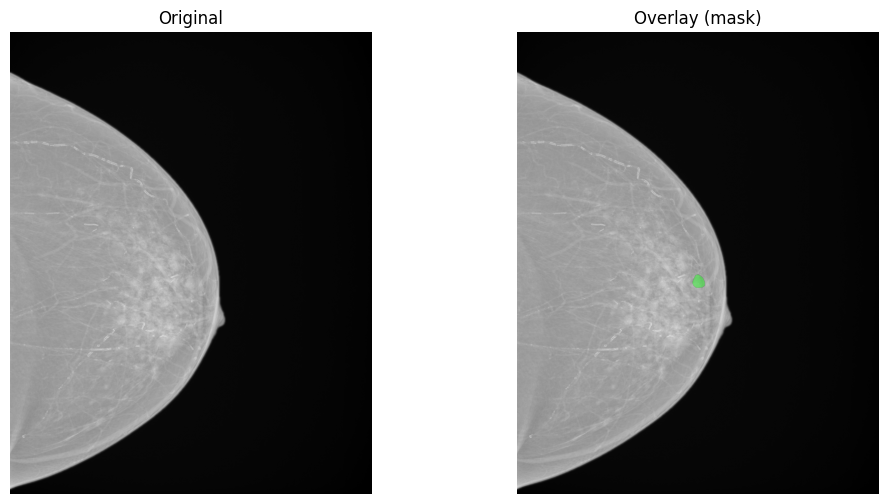

{'seriesDescription': 'MG', 'stackId': '4092', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/17e0925c-ab6196e5-3b12d94d-9fa45fb6-0c46cdd7/file'], 'seriesIndex': 2, 'currentImageIdIndex': 0, 'viewPosition': 'CC', 'imageSide': 'R', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 1238.1880051058442, 'y': 1522.486487275403, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1240.4489436884696, 'y': 1510.0513250709641, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1242.7098822710948, 'y': 1493.0942857012747, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1251.7536366015959, 'y': 1444.4841061748316, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1260.7973909320967, 'y

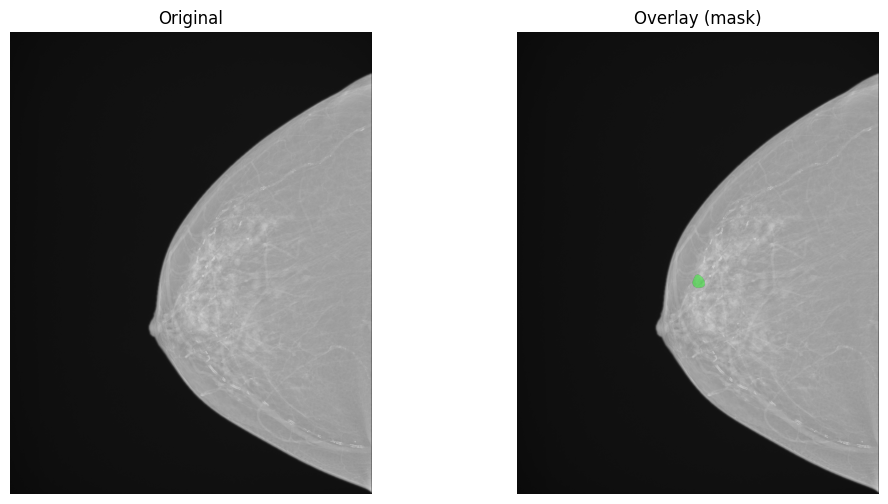

{'seriesDescription': 'MG', 'stackId': '4092', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/706a280c-4d460457-d99658ff-97727592-75a69b47/file'], 'seriesIndex': 3, 'currentImageIdIndex': 0, 'viewPosition': 'MLO', 'imageSide': 'L', 'freehand': [{'visible': True, 'active': False, 'handles': [{'x': 1322.6311837326548, 'y': 1631.3538340627604, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 1309.3929033622348, 'y': 1618.1155536923404}]}, {'x': 1309.3929033622348, 'y': 1618.1155536923404, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 1304.4285482233274, 'y': 1598.2581331367105}]}, {'x': 1304.4285482233274, 'y': 1598.2581331367105, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 1311.0476884085374, 'y': 1581.7102826736857}]}, {'x': 1311.0476884085374, 'y': 1581.7102826736857, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 1327.5955388715622, 'y': 1571.7815723958709}]}, {'x': 1327.595

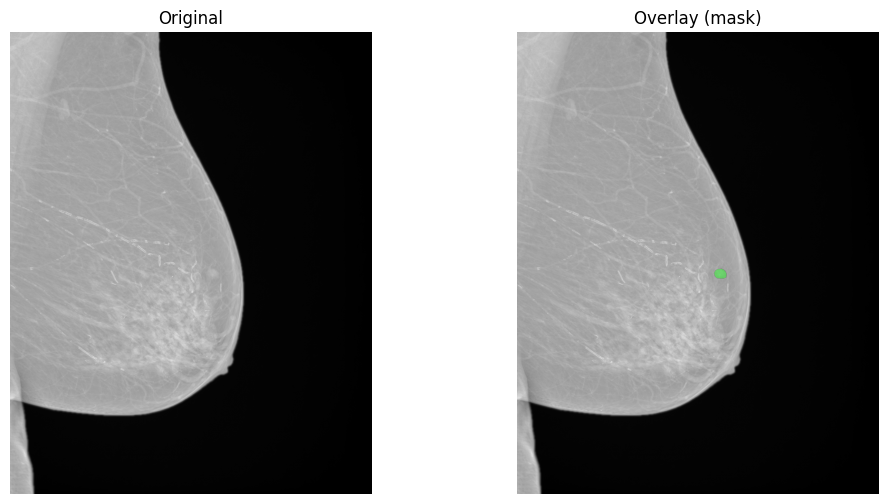

{'seriesDescription': 'MG', 'stackId': '4092', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/8418401c-a4bb99f7-2f347473-dbc48032-c5764ae2/file'], 'seriesIndex': 4, 'currentImageIdIndex': 0, 'viewPosition': 'MLO', 'imageSide': 'R', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 1296.1982507288626, 'y': 1406.0204081632653, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1309.5889212827983, 'y': 1356.9212827988338, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1510.4489795918362, 'y': 1084.6443148688045, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1564.01166180758, 'y': 964.1282798833819, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1693.4548104956266, 'y'

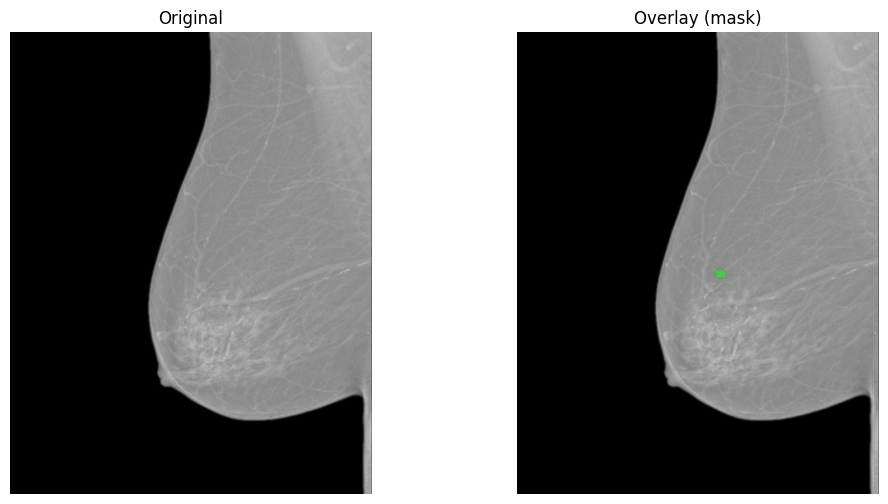

Loading annotations from: 829de0c1-5e7a-4b9a-978a-537922a46b35.json
{'seriesDescription': 'MG', 'stackId': '2527', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/eb3d2db3-3cdb83f3-0a21922e-b88c0338-f6874594/file'], 'seriesIndex': 0, 'currentImageIdIndex': 0, 'viewPosition': 'CC', 'imageSide': 'R', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 1509.7638483965013, 'y': 1063.399416909621, 'highlight': True, 'active': False}}, 'invalidated': True}]}
Checking DICOM file: Anonymized2\MG000000.dcm
Checking DICOM file: Anonymized2\MG000001.dcm
Matched DICOM file: Anonymized2\MG000001.dcm
1631.3538340627604
1618.1155536923404
1598.2581331367105
1581.7102826736857
1571.7815723958709
1568.4720023032658
1581.7102826736857
1603.2224882756182
1626.389478923853
1634.6634041553655
1634.6634041553655


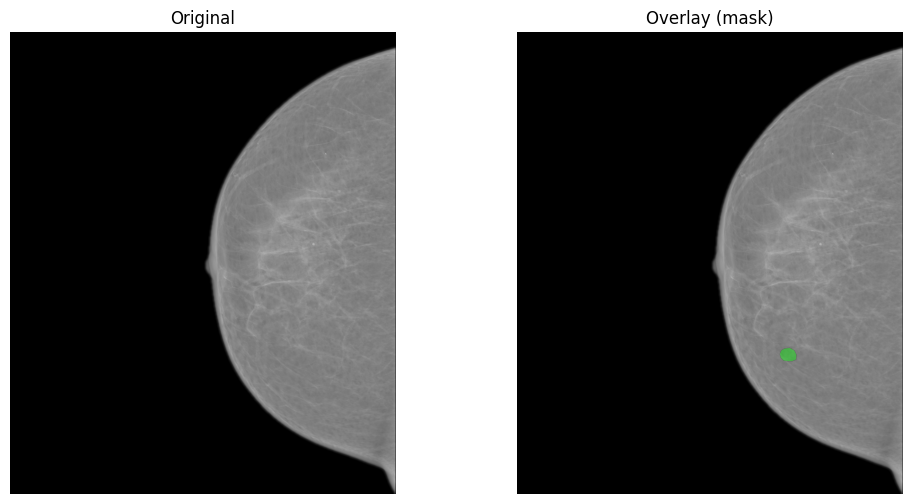

{'seriesDescription': 'MG', 'stackId': '2527', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/be4bb2ad-ba13f1cc-f12d5f44-8df109b0-db03cb61/file'], 'seriesIndex': 1, 'currentImageIdIndex': 0, 'viewPosition': 'MLO', 'imageSide': 'R', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 1327.5145772594753, 'y': 1531.5626822157435, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1367.6428571428573, 'y': 1307.5131195335277, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1337.5466472303208, 'y': 1280.7609329446063, 'highlight': True, 'active': False}}, 'invalidated': True}]}
Checking DICOM file: Anonymized2\MG000000.dcm
Matched DICOM file: Anonymized2\MG000000.dcm
1631.3538340627604
1618.1155536923404
1598.2581331367105
1581.7102826736857
1571.7815723958709
1568.4720023032658
1581.7102826736857
1603.2224882756182
1

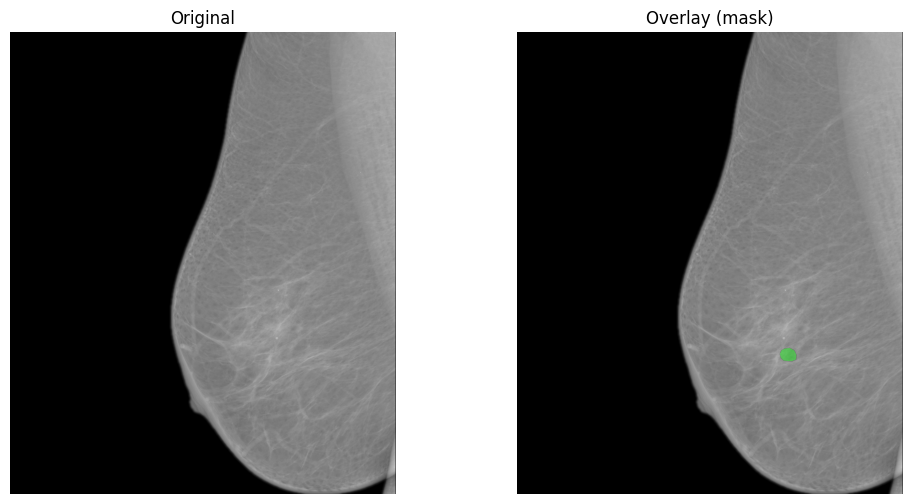

Loading annotations from: b191c30e-db18-4d25-b156-6b6bc2dda995.json
{'seriesDescription': 'MG', 'stackId': '541', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/7c1cb631-c49feb68-3e11d0e7-b703e073-973bfcbc/file'], 'seriesIndex': 1, 'currentImageIdIndex': 0, 'viewPosition': 'CC', 'imageSide': 'L', 'freehand': [{'visible': True, 'active': False, 'handles': [{'x': 55.11370262390665, 'y': 862.7580174927114, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 132.02623906705526, 'y': 896.198250728863}]}, {'x': 132.02623906705526, 'y': 896.198250728863, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 249.0670553935861, 'y': 872.7900874635569}]}, {'x': 249.0670553935861, 'y': 872.7900874635569, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 299.2274052478133, 'y': 842.6938775510205}]}, {'x': 299.2274052478133, 'y': 842.6938775510205, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 349.387755

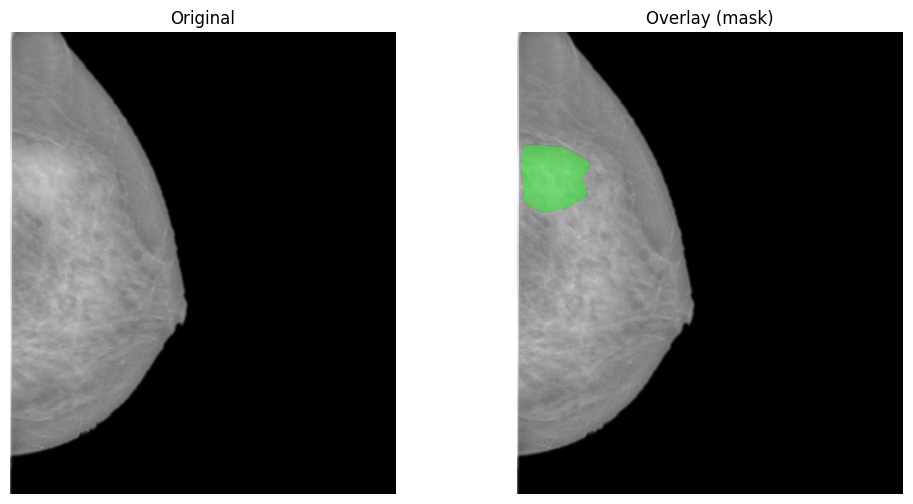

{'seriesDescription': 'MG', 'stackId': '540', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/a31fb8f1-8fea20ea-bc9507ea-ca7389d1-0f7d14e6/file'], 'seriesIndex': 3, 'currentImageIdIndex': 0, 'viewPosition': 'MLO', 'imageSide': 'L', 'freehand': [{'visible': True, 'active': False, 'handles': [{'x': 31.705539358600618, 'y': 1009.8950437317784, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 65.14577259475209, 'y': 1029.9591836734694}]}, {'x': 65.14577259475209, 'y': 1029.9591836734694, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 51.7696793002915, 'y': 1063.399416909621}]}, {'x': 51.7696793002915, 'y': 1063.399416909621, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 91.89795918367349, 'y': 1056.7113702623908}]}, {'x': 91.89795918367349, 'y': 1056.7113702623908, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 168.8104956268221, 'y': 1043.33527696793}]}, {'x': 168.8104956268221, 'y'

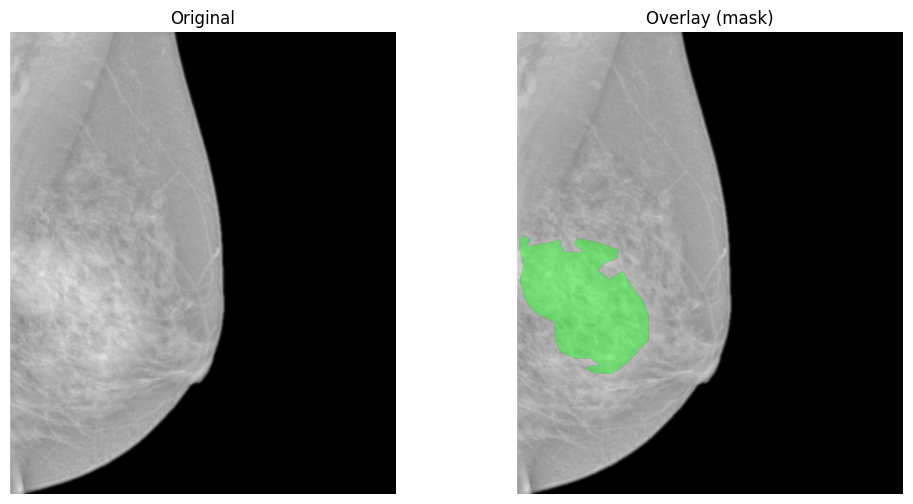

In [124]:



def get_coordinates(annotation):
    coordinates = []
    x= annotation.get("x")
    y= annotation.get("y")
    coordinates.append(x)
    coordinates.append(y)
    return coordinates


def get_dicom(dicom_id,dicom_view,dicom_laterilty):
    #Change directory to dicom dataset path
    dataset_path = "C:\\Users\\alqud\\Desktop\\2025\\Breast Cancer\\dataset-uta7-dicom\\dataset"
    os.chdir(dataset_path)
    patient_dict= {"6244f5c5-faf5-4e52-83e6-74fee6476dec":"Anonymized1",
                   "829de0c1-5e7a-4b9a-978a-537922a46b35":"Anonymized2",
                   "fb8c2ffc-5f8c-4ac7-a8d9-74b3c56b69a4":"Anonymized3",
                   "b191c30e-db18-4d25-b156-6b6bc2dda995":"Anonymized4"
                   }
    for filename in glob.glob(patient_dict[dicom_id]+"\\*.dcm"): # Loop through all DICOM files in the directory

        print(f"Checking DICOM file: {filename}")
        ds = pydicom.dcmread(filename)
        if ds.get("ViewPosition") == dicom_view and ds.get("ImageLaterality") == dicom_laterilty:
            print(f"Matched DICOM file: {filename}")
            return ds



#Change directory to annotation dataset path
dataset_path = "C:\\Users\\alqud\\Desktop\\2025\\Breast Cancer\\dataset-uta7-annotations\\dataset" 
os.chdir(dataset_path)
for json_file in glob.glob("*.json"): # Loop through all JSON files in the directory
    dataset_path = "C:\\Users\\alqud\\Desktop\\2025\\Breast Cancer\\dataset-uta7-annotations\\dataset" 
    os.chdir(dataset_path)
    if json_file not in ["b191c30e-db18-4d25-b156-6b6bc2dda995.json","6244f5c5-faf5-4e52-83e6-74fee6476dec.json","829de0c1-5e7a-4b9a-978a-537922a46b35.json"]:
        continue
    print(f"Loading annotations from: {json_file}")
    with open(json_file, 'r') as f:
        json_data = json.load(f)

        json_stacks= json_data.get("rawData", {}).get("stacks", [])
        for stack in json_stacks:
            if  "freehand" in stack.keys():
                annotations = "freehand" if "freehand" in stack.keys() else "probe"
                if stack.get("seriesDescription") != "MG":
                    continue
                view_position= stack.get("viewPosition")
                laterality= stack.get("imageSide")
                print(stack)
                handles =stack.get(annotations, {})[0].get("handles")
                coordinates= []
                for handle in handles:
                    coordinates.append(get_coordinates(handle))
                dicom_ds= get_dicom(json_data.get("rawData", {}).get("studyId"),view_position,laterality)
                image_data, mask=create_mask(dicom_ds,coordinates)
                overlay_mask_on_image(image_data,mask)

            elif "probe" in stack.keys():
                annotations = "probe" 
                if stack.get("seriesDescription") != "MG":
                    continue
                view_position= stack.get("viewPosition")
                laterality= stack.get("imageSide")
                probe = stack.get("probe")
                print(stack)
                coordinates= []
                for handle in handles:
                    coordinates.append(get_coordinates(handle))
                dicom_ds= get_dicom(json_data.get("rawData", {}).get("studyId"),view_position,laterality)
                image_data, mask=create_mask(dicom_ds,coordinates)
                overlay_mask_on_image(image_data,mask)
                
                
                #     print(f"Coordinates: {coords}")
            
            
   


In [128]:
def get_dataset():

            dataset_path = "C:\\Users\\alqud\\Desktop\\2025\\Breast Cancer\\dataset-uta7-annotations\\dataset" 
            os.chdir(dataset_path)
            for json_file in glob.glob("*.json"): # Loop through all JSON files in the directory
                dataset_path = "C:\\Users\\alqud\\Desktop\\2025\\Breast Cancer\\dataset-uta7-annotations\\dataset" 
                os.chdir(dataset_path)
                if json_file not in ["b191c30e-db18-4d25-b156-6b6bc2dda995.json","6244f5c5-faf5-4e52-83e6-74fee6476dec.json","829de0c1-5e7a-4b9a-978a-537922a46b35.json"]:
                    continue
                print(f"Loading annotations from: {json_file}")
                output_dict= {}
                with open(json_file, 'r') as f:
                    json_data = json.load(f)

                    json_stacks= json_data.get("rawData", {}).get("stacks", [])
                    for stack in json_stacks:
                        if  "freehand" in stack.keys():
                            annotations = "freehand" if "freehand" in stack.keys() else "probe"
                            if stack.get("seriesDescription") != "MG":
                                continue
                            view_position= stack.get("viewPosition")
                            laterality= stack.get("imageSide")
                            print(stack)
                            handles =stack.get(annotations, {})[0].get("handles")
                            coordinates= []
                            for handle in handles:
                                coordinates.append(get_coordinates(handle))
                            image_string= json_data.get("rawData", {}).get("studyId") + "_" + view_position + "_" + laterality
                            
                            dicom_ds= get_dicom(json_data.get("rawData", {}).get("studyId"),view_position,laterality)
                            image_data, mask=create_mask(dicom_ds,coordinates)
                            output_dict[image_string+"_image"]= image_data
                            output_dict[image_string+"_mask"]= mask
                            overlay_mask_on_image(image_data,mask)

                        elif "probe" in stack.keys():
                            annotations = "probe" 
                            if stack.get("seriesDescription") != "MG":
                                continue
                            view_position= stack.get("viewPosition")
                            laterality= stack.get("imageSide")
                            probe = stack.get("probe")
                            print(stack)
                            coordinates= []
                            for handle in handles:
                                coordinates.append(get_coordinates(handle))
                            dicom_ds= get_dicom(json_data.get("rawData", {}).get("studyId"),view_position,laterality)
                            image_data, mask=create_mask(dicom_ds,coordinates)
                            image_string= json_data.get("rawData", {}).get("studyId") + "_" + view_position + "_" + laterality
                            output_dict[image_string+"_image"]= image_data
                            output_dict[image_string+"_mask"]= mask
                            overlay_mask_on_image(image_data,mask)
            return output_dict
                            
                        #     print(f"Coordinates: {coords}")
                    
            
   


Loading annotations from: 6244f5c5-faf5-4e52-83e6-74fee6476dec.json
{'seriesDescription': 'MG', 'stackId': '4092', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/b5575cc9-6745a74c-5366c4e7-77e55d24-b74161cb/file'], 'seriesIndex': 1, 'currentImageIdIndex': 0, 'viewPosition': 'CC', 'imageSide': 'L', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 106.616955409409, 'y': 738.0891826890629, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 157.09570677787974, 'y': 728.7412657689758, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 181.40029077010638, 'y': 732.4804325370106, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 222.53112521848993, 'y': 734.3500159210281, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, '

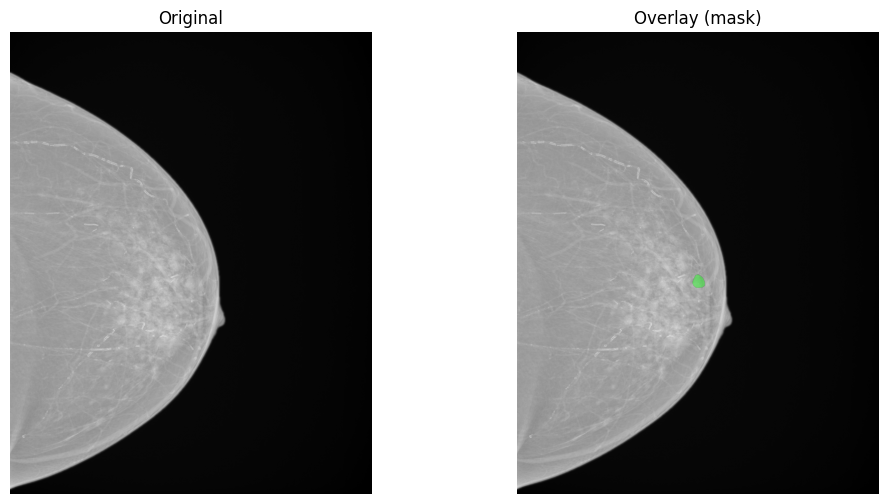

{'seriesDescription': 'MG', 'stackId': '4092', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/17e0925c-ab6196e5-3b12d94d-9fa45fb6-0c46cdd7/file'], 'seriesIndex': 2, 'currentImageIdIndex': 0, 'viewPosition': 'CC', 'imageSide': 'R', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 1238.1880051058442, 'y': 1522.486487275403, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1240.4489436884696, 'y': 1510.0513250709641, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1242.7098822710948, 'y': 1493.0942857012747, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1251.7536366015959, 'y': 1444.4841061748316, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1260.7973909320967, 'y

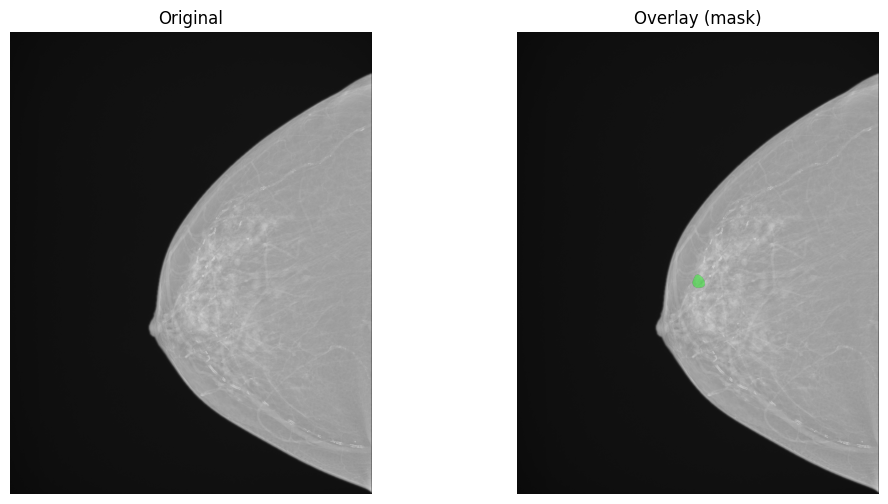

{'seriesDescription': 'MG', 'stackId': '4092', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/706a280c-4d460457-d99658ff-97727592-75a69b47/file'], 'seriesIndex': 3, 'currentImageIdIndex': 0, 'viewPosition': 'MLO', 'imageSide': 'L', 'freehand': [{'visible': True, 'active': False, 'handles': [{'x': 1322.6311837326548, 'y': 1631.3538340627604, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 1309.3929033622348, 'y': 1618.1155536923404}]}, {'x': 1309.3929033622348, 'y': 1618.1155536923404, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 1304.4285482233274, 'y': 1598.2581331367105}]}, {'x': 1304.4285482233274, 'y': 1598.2581331367105, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 1311.0476884085374, 'y': 1581.7102826736857}]}, {'x': 1311.0476884085374, 'y': 1581.7102826736857, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 1327.5955388715622, 'y': 1571.7815723958709}]}, {'x': 1327.595

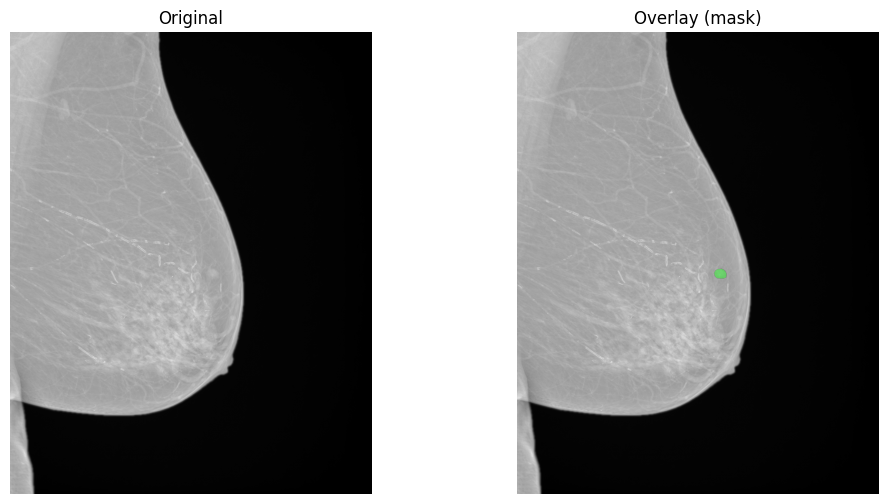

{'seriesDescription': 'MG', 'stackId': '4092', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/8418401c-a4bb99f7-2f347473-dbc48032-c5764ae2/file'], 'seriesIndex': 4, 'currentImageIdIndex': 0, 'viewPosition': 'MLO', 'imageSide': 'R', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 1296.1982507288626, 'y': 1406.0204081632653, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1309.5889212827983, 'y': 1356.9212827988338, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1510.4489795918362, 'y': 1084.6443148688045, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1564.01166180758, 'y': 964.1282798833819, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1693.4548104956266, 'y'

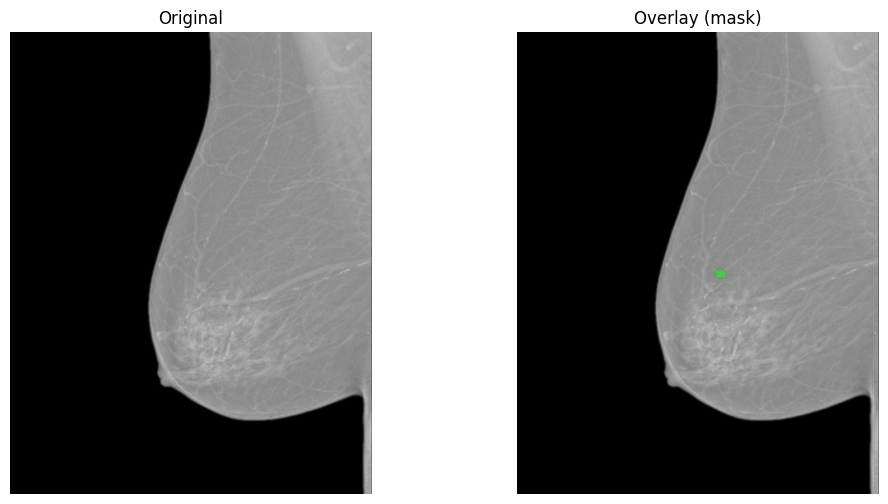

Loading annotations from: 829de0c1-5e7a-4b9a-978a-537922a46b35.json
{'seriesDescription': 'MG', 'stackId': '2527', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/eb3d2db3-3cdb83f3-0a21922e-b88c0338-f6874594/file'], 'seriesIndex': 0, 'currentImageIdIndex': 0, 'viewPosition': 'CC', 'imageSide': 'R', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 1509.7638483965013, 'y': 1063.399416909621, 'highlight': True, 'active': False}}, 'invalidated': True}]}
Checking DICOM file: Anonymized2\MG000000.dcm
Checking DICOM file: Anonymized2\MG000001.dcm
Matched DICOM file: Anonymized2\MG000001.dcm
1631.3538340627604
1618.1155536923404
1598.2581331367105
1581.7102826736857
1571.7815723958709
1568.4720023032658
1581.7102826736857
1603.2224882756182
1626.389478923853
1634.6634041553655
1634.6634041553655


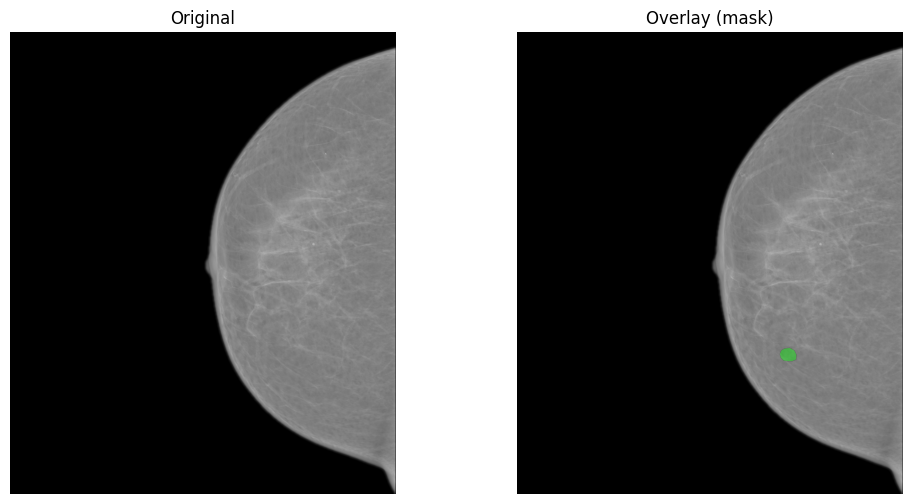

{'seriesDescription': 'MG', 'stackId': '2527', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/be4bb2ad-ba13f1cc-f12d5f44-8df109b0-db03cb61/file'], 'seriesIndex': 1, 'currentImageIdIndex': 0, 'viewPosition': 'MLO', 'imageSide': 'R', 'probe': [{'visible': True, 'active': False, 'handles': {'end': {'x': 1327.5145772594753, 'y': 1531.5626822157435, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1367.6428571428573, 'y': 1307.5131195335277, 'highlight': True, 'active': False}}, 'invalidated': True}, {'visible': True, 'active': False, 'handles': {'end': {'x': 1337.5466472303208, 'y': 1280.7609329446063, 'highlight': True, 'active': False}}, 'invalidated': True}]}
Checking DICOM file: Anonymized2\MG000000.dcm
Matched DICOM file: Anonymized2\MG000000.dcm
1631.3538340627604
1618.1155536923404
1598.2581331367105
1581.7102826736857
1571.7815723958709
1568.4720023032658
1581.7102826736857
1603.2224882756182
1

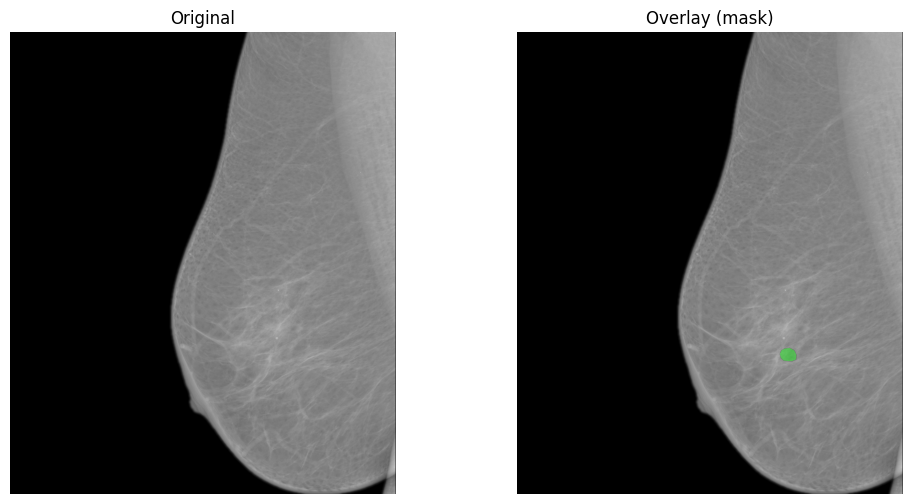

Loading annotations from: b191c30e-db18-4d25-b156-6b6bc2dda995.json
{'seriesDescription': 'MG', 'stackId': '541', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/7c1cb631-c49feb68-3e11d0e7-b703e073-973bfcbc/file'], 'seriesIndex': 1, 'currentImageIdIndex': 0, 'viewPosition': 'CC', 'imageSide': 'L', 'freehand': [{'visible': True, 'active': False, 'handles': [{'x': 55.11370262390665, 'y': 862.7580174927114, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 132.02623906705526, 'y': 896.198250728863}]}, {'x': 132.02623906705526, 'y': 896.198250728863, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 249.0670553935861, 'y': 872.7900874635569}]}, {'x': 249.0670553935861, 'y': 872.7900874635569, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 299.2274052478133, 'y': 842.6938775510205}]}, {'x': 299.2274052478133, 'y': 842.6938775510205, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 349.387755

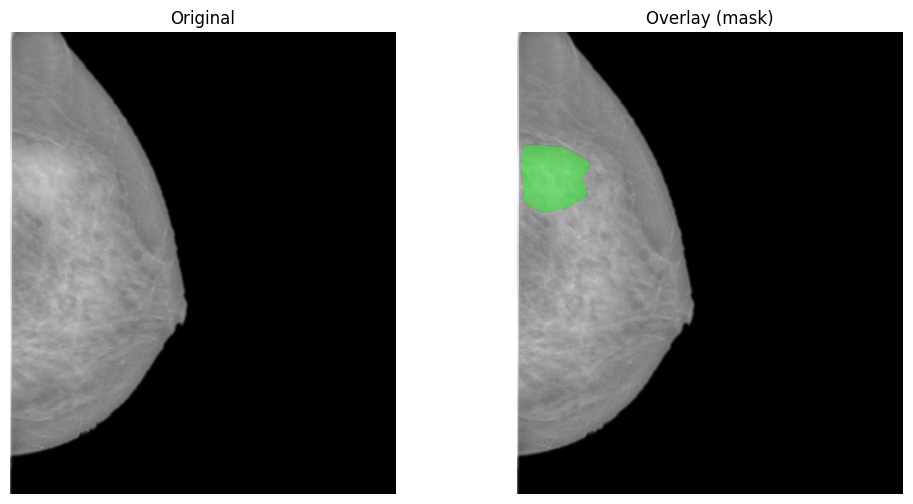

{'seriesDescription': 'MG', 'stackId': '540', 'imageIds': ['wadouri://breastscreening.arditi.pt:8549/instances/a31fb8f1-8fea20ea-bc9507ea-ca7389d1-0f7d14e6/file'], 'seriesIndex': 3, 'currentImageIdIndex': 0, 'viewPosition': 'MLO', 'imageSide': 'L', 'freehand': [{'visible': True, 'active': False, 'handles': [{'x': 31.705539358600618, 'y': 1009.8950437317784, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 65.14577259475209, 'y': 1029.9591836734694}]}, {'x': 65.14577259475209, 'y': 1029.9591836734694, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 51.7696793002915, 'y': 1063.399416909621}]}, {'x': 51.7696793002915, 'y': 1063.399416909621, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 91.89795918367349, 'y': 1056.7113702623908}]}, {'x': 91.89795918367349, 'y': 1056.7113702623908, 'highlight': True, 'active': True, 'lastFlag': False, 'lines': [{'x': 168.8104956268221, 'y': 1043.33527696793}]}, {'x': 168.8104956268221, 'y'

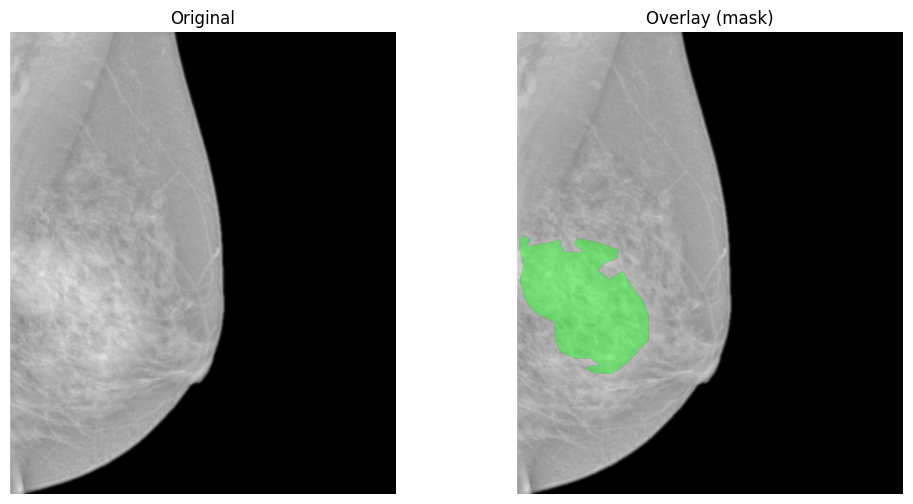

In [129]:
mydict = get_dataset()